## Penerapan OCR tidak hanya pada plat. Bisa pada media lain selama ada citra yang berisi huruf dan angka.

In [19]:
pip install imutils

In [20]:
pip install easyocr

In [21]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

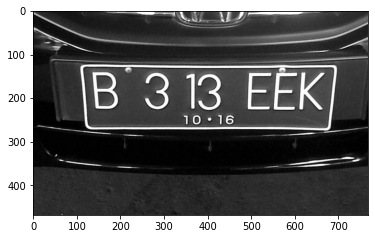

In [22]:
img = cv2.imread('Plat B.jpeg')
# UBAH GAMBAR WARNA KE GRAYSCALE

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# TAMPILKAN MENGGUNAKAN LIBRARY MATPLOTLIB
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

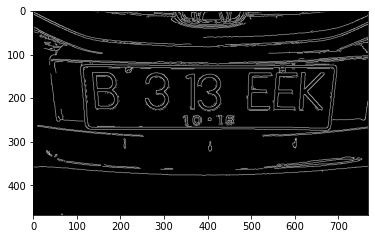

In [23]:
# SMOOTHING GAMBAR DENGAN BILATERAL FILTER
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)

# EDGE DETECTION DENGAN METODE CANNY
edged = cv2.Canny(bfilter, 30, 100)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [27]:
"""
FIND CONTOURS MENDETEKSI PERUBAHAN WARNA GAMBAR DAN MENANDAINYA SEBAGAI KONTUR.
GAMBAR ATAU ANGKA YANG TERTULIS PADA CITRA AKAN DIDETEKSI SEBAGAI KONTUR.
"""
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [28]:
"""
APPROXPOLYDP MEMUNGKINKAN PERKIRAAN POLIGON (GAMBAR BANYAK SUDUT),
JADI JIKA GAMBAR BERISI POLIGON, FUNGSI INI AKAN CUKUP AKURAT MENDETEKSINYA.
"""
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [29]:
location

array([[[108, 130]],

       [[690, 125]],

       [[682, 267]],

       [[130, 272]]], dtype=int32)

In [30]:
"""
DRAWCONTOURS BERFUNGSI UNTUK MELAPISI KONTUR PADA GAMBAR RGB ASLI.
"""
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

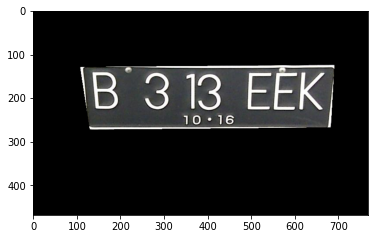

In [31]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [32]:
# CROPPING GAMBAR
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

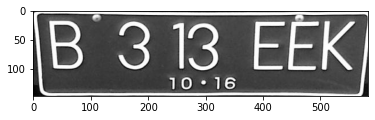

In [34]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [35]:
# PENERAPAN LIBRARY EASYOCR
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[19, 5], [335, 5], [335, 113], [19, 113]], 'B 3 13', 0.851666804326082),
 ([[373, 3], [573, 3], [573, 117], [373, 117]], 'EEK', 0.9992373146152158),
 ([[232, 110], [358, 110], [358, 142], [232, 142]],
  "10 ' 16",
  0.8975757654362415)]

In [36]:
"""
DARI KONVERSI OCR TERDAPAT 3 LIST (DALAM BAHASA PEMROGRAMAN LAIN DISEBUT DENGAN ARRAY),
UNTUK MENGELIMINASI BILANGAN YANG TIDAK PENTING DAN HANYA MENGAMBIL VALUE HASIL OCR,
TULIS KODE SEPERTI DIBAWAH.

PENULISAN KODE DIBAWAH DISESUAIKAN DENGAN HASIL OCR,
APABILA 2 LIST, HANYA TULISKAN SAMPAI LIST KEDUA,
APABILA 3 LIST, HANYA TULISKAN SAMPAI LIST KETIGA,
"""
text1 = str.upper(result[0][1])
text2 = str.upper(result[1][1])
text3 = str.upper(result[2][1])

In [37]:
# TAMPILKAN ISI VARIABEL TEXT
text1, text2, text3

('B 3 13', 'EEK', "10 ' 16")